<a href="https://colab.research.google.com/github/MdShakil-Hossain/CSE-366-AI-Labs/blob/main/Lab_2_Trading_Agent_for_Smartphone_Inventory_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import math
import matplotlib.pyplot as plt


In [8]:
def select_from_dist(dist):
    """Randomly selects an item based on the given probability distribution."""
    r = random.random()
    for item, prob in dist.items():
        if r < prob:
            return item
        r -= prob
    raise RuntimeError("Invalid probability distribution")


In [9]:
class SmartphoneEnv:
    def __init__(self):
        """Initialize environment variables."""
        self.time = 0
        self.stock = 20
        self.stock_history = []
        self.price_history = []
        self.average_price = 600
        self.sd = 50

    def initial_percept(self):
        """Generate initial percepts for price and stock."""
        self.price = round(self.average_price + self.sd * random.gauss(0, 1))
        self.stock_history.append(self.stock)
        self.price_history.append(self.price)
        return {'price': self.price, 'instock': self.stock}

    def do(self, action):
        """Update environment based on the agent's action."""
        bought = action['buy']
        self.stock += bought - random.randint(1, 5)  # Random stock usage
        self.stock_history.append(self.stock)
        self.time += 1
        self.price = round(self.average_price + self.sd * random.gauss(0, 1))
        self.price_history.append(self.price)
        return {'price': self.price, 'instock': self.stock}


In [10]:
class SmartphoneAgent:
    def __init__(self, env):
        """Initialize agent with environment's initial percepts."""
        percept = env.initial_percept()
        self.average_price = percept['price']
        self.stock = percept['instock']
        self.buy_history = []

    def select_action(self, percept):
        """Decide the next action based on percepts."""
        self.average_price += (percept['price'] - self.average_price) * 0.05
        self.stock = percept['instock']
        if percept['price'] < 0.8 * self.average_price and self.stock >= 10:
            tobuy = 15
        elif self.stock < 10:
            tobuy = 10
        else:
            tobuy = 0
        self.buy_history.append(tobuy)
        return {'buy': tobuy}


In [11]:
class Simulation:
    def __init__(self, agent, env):
        """Initialize simulation with agent and environment."""
        self.agent = agent
        self.env = env
        self.percept = env.initial_percept()

    def run(self, steps):
        """Run the simulation for a number of steps."""
        for _ in range(steps):
            action = self.agent.select_action(self.percept)
            self.percept = self.env.do(action)


In [14]:
def plot_results(env, agent):
    """Plot price, stock, and buying history."""
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)
    plt.plot(env.price_history, label='Price')
    plt.plot(env.stock_history, label='Stock')
    plt.legend()
    plt.title("Price and Stock Over Time")

    plt.subplot(2, 1, 2)
    plt.bar(range(len(agent.buy_history)), agent.buy_history, label='Bought')
    plt.legend()
    plt.title("Buying History")
    plt.show()


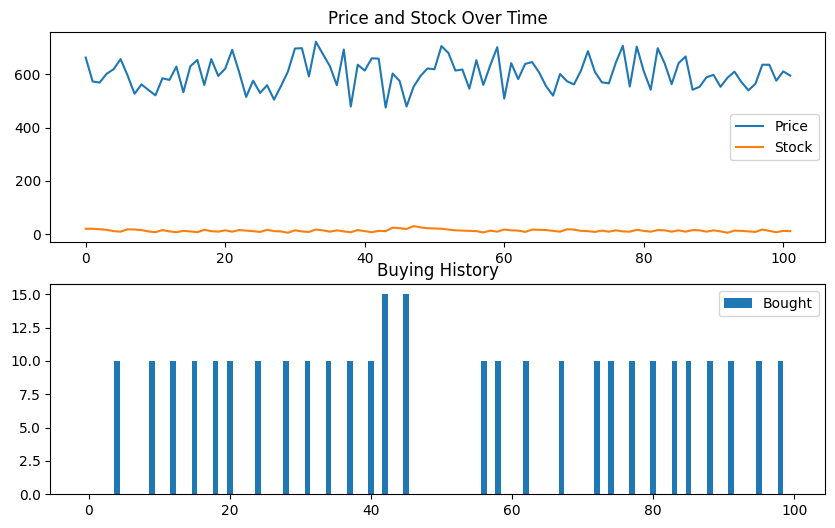

In [15]:
env = SmartphoneEnv()
agent = SmartphoneAgent(env)
sim = Simulation(agent, env)

sim.run(100)
plot_results(env, agent)
